<a href="https://colab.research.google.com/github/Dhanush-adk/ITCS-5156_Project/blob/main/ClassicalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
data = pd.read_csv(r"https://raw.githubusercontent.com/Dhanush-adk/ITCS-5156_Project/main/Data/train11_dataframe.csv")
removed_column = data.pop('label')
Y = pd.DataFrame({'age group': removed_column})
X = data
X.shape

(17846, 23)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [16]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y_train, encoder = get_labels(y_train)
y_test = encoder.transform(y_test)
y_test = y_test.ravel()
y_train = y_train.ravel()
y_test[:50]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 7, 1, 2, 6, 7, 1, 5, 6, 6, 1, 7, 3, 7, 6, 6, 4, 3, 7, 6, 1, 5,
       7, 7, 6, 6, 7, 2, 2, 7, 5, 7, 2, 6, 6, 2, 7, 1, 1, 7, 1, 1, 6, 2,
       6, 7, 1, 1, 1, 7])

In [10]:
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
n = X.shape[1]

In [11]:
# Linear Regression
linear_reg_model = LinearRegression()

# Training the model
linear_reg_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_linear = linear_reg_model.predict(x_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear}")

# If you want to access the coefficients and intercept:
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Accuracy for regression is not applicable, but you can print R-squared
r_squared = linear_reg_model.score(x_test, y_test)
print(f"R-squared (Linear Regression): {r_squared}")


Mean Squared Error (Linear Regression): 4.8522831497562
Coefficients: [ 0.05530323 -0.00138559 -0.08593876 -0.04580891  0.29673229 -0.10609384
 -0.07259886  0.14499019  0.02728104  0.06393922 -0.04676319  0.12684879
 -0.15295571  0.12819682 -0.21326795 -0.136773   -0.18066679  0.17745317
  0.06137036  0.19919581  0.03387055  0.12327866 -0.18812528]
Intercept: 4.790627626786215
R-squared (Linear Regression): 0.05040386231787164


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy (Logistic Regression): 0.3442577030812325
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.31      0.09      0.14       456
           2       0.31      0.09      0.14       572
           3       0.25      0.01      0.03        71
           4       0.12      0.02      0.04       234
           5       0.47      0.02      0.04       300
           6       0.32      0.43      0.37       842
           7       0.37      0.71      0.48      1079

    accuracy                           0.34      3570
   macro avg       0.27      0.17      0.16      3570
weighted avg       0.33      0.34      0.28      3570

Confusion Matrix (Logistic Regression):
 [[  0   0   2   0   0   0   6   8]
 [  0  43  32   0   8   2 161 210]
 [  0  21  54   1   9   1 159 327]
 [  0   1   3   1   2   0  23  41]
 [  0  18  13   0   5   0  91 107]
 [  0  11   4   0   2   7  67 209]
 

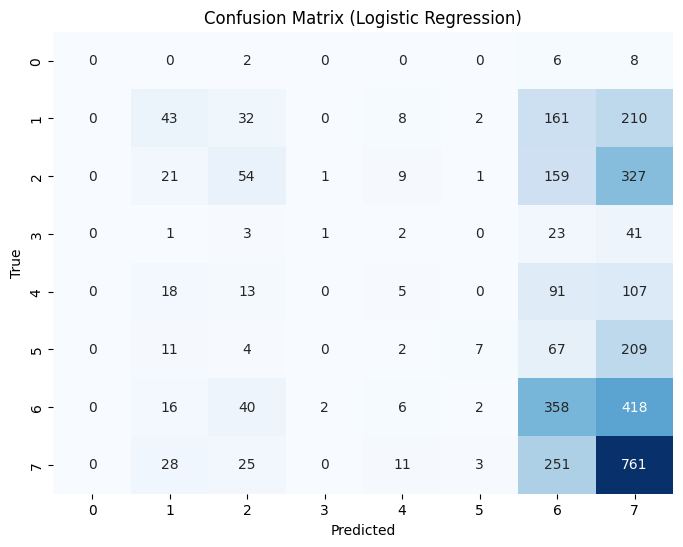

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined and properly formatted

# Logistic Regression
logistic_reg_model = LogisticRegression()

# Training the model
logistic_reg_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_logistic = logistic_reg_model.predict(x_test)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f"Accuracy (Logistic Regression): {accuracy_logistic}")
print("Classification Report (Logistic Regression):\n", classification_report_logistic)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logistic)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=logistic_reg_model.classes_, yticklabels=logistic_reg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


Accuracy (SVC with RBF kernel): 0.7361344537815127
Classification Report (SVC with RBF kernel):
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.77      0.75      0.76       456
           2       0.78      0.69      0.73       572
           3       0.84      0.73      0.78        71
           4       0.81      0.67      0.73       234
           5       0.77      0.61      0.68       300
           6       0.70      0.77      0.73       842
           7       0.71      0.78      0.74      1079

    accuracy                           0.74      3570
   macro avg       0.79      0.73      0.75      3570
weighted avg       0.74      0.74      0.74      3570

Confusion Matrix (SVC with RBF kernel):
 [[ 13   1   0   0   0   0   1   1]
 [  1 341  19   1   1   2  34  57]
 [  0  25 396   4   9   5  64  69]
 [  0   3   3  52   4   0   4   5]
 [  0   4   6   3 157   5  25  34]
 [  0  14   7   0   4 184  35  56]
 

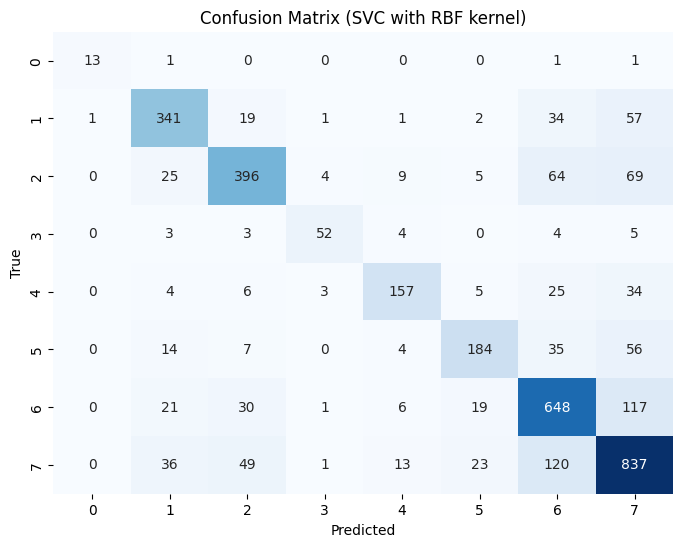

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the SVM model with RBF kernel
svc_model_rbf = SVC(kernel='rbf', C=10)
svc_model_rbf.fit(x_train, y_train)

# Predicting on the test set
y_pred_svc_rbf = svc_model_rbf.predict(x_test)

# Evaluating the model
accuracy_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)
classification_report_svc_rbf = classification_report(y_test, y_pred_svc_rbf)
conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)

print(f"Accuracy (SVC with RBF kernel): {accuracy_svc_rbf}")
print("Classification Report (SVC with RBF kernel):\n", classification_report_svc_rbf)
print("Confusion Matrix (SVC with RBF kernel):\n", conf_matrix_svc_rbf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc_rbf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svc_model_rbf.classes_, yticklabels=svc_model_rbf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVC with RBF kernel)')
plt.show()


Accuracy (KNeighborsClassifier): 0.8095238095238095
Classification Report (KNeighborsClassifier):
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.81      0.82      0.81       456
           2       0.81      0.80      0.81       572
           3       0.75      0.77      0.76        71
           4       0.83      0.87      0.85       234
           5       0.84      0.75      0.79       300
           6       0.78      0.83      0.80       842
           7       0.83      0.80      0.81      1079

    accuracy                           0.81      3570
   macro avg       0.81      0.81      0.81      3570
weighted avg       0.81      0.81      0.81      3570

Confusion Matrix (KNeighborsClassifier):
 [[ 14   1   0   0   0   0   1   0]
 [  1 373  14   3   2   1  28  34]
 [  0  20 459   1   3   7  48  34]
 [  0   2   2  55   2   1   6   3]
 [  0   3   3   0 204   3   7  14]
 [  0  10  13   1   3 224  22  27

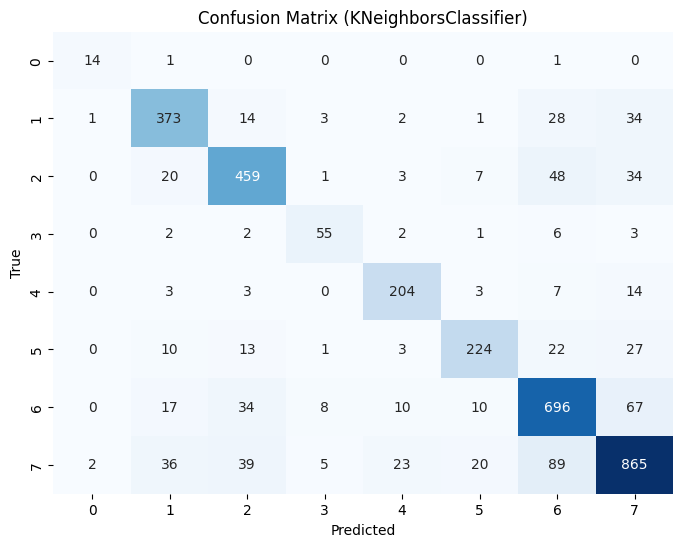

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined and properly formatted

# Create KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=1)  # You can adjust the number of neighbors (n_neighbors) as needed

# Training the model
knn_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(x_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy (KNeighborsClassifier): {accuracy_knn}")
print("Classification Report (KNeighborsClassifier):\n", classification_report_knn)
print("Confusion Matrix (KNeighborsClassifier):\n", conf_matrix_knn)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (KNeighborsClassifier)')
plt.show()
